In [9]:
!ls data/Police\ Precincts

geo_export_0ee8f408-5297-473b-a665-04ef06fc8f3f.dbf
geo_export_0ee8f408-5297-473b-a665-04ef06fc8f3f.prj
geo_export_0ee8f408-5297-473b-a665-04ef06fc8f3f.shp
geo_export_0ee8f408-5297-473b-a665-04ef06fc8f3f.shx


In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
# set the filepath and load in a shapefile
fp = 'data/Police Precincts/geo_export_0ee8f408-5297-473b-a665-04ef06fc8f3f.shp'
map_df = gpd.read_file(fp)

# check the first few rows of the dataframe
map_df.head()

,precinct,shape_area,shape_leng,geometry
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...
1,5.0,1.808880e+07,18676.124259,POLYGON ((-73.98863862848766 40.72293372026369...
2,6.0,2.209819e+07,26402.900669,POLYGON ((-73.99968392160721 40.73855224865976...
3,71.0,4.533179e+07,29978.094261,POLYGON ((-73.92854313809303 40.66457328584737...
4,72.0,1.046213e+08,87968.194520,POLYGON ((-73.99840899113158 40.67186872303234...


In [27]:
type(map_df)

geopandas.geodataframe.GeoDataFrame

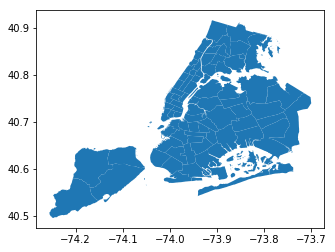

In [11]:
# check that the basic structure of the map is correct
map_df.plot()

In [12]:
four = pd.read_csv('data/monthly_total_by_precinct.csv')
four.columns = four.columns.astype(str)
four.rename(columns={'complaint_date':'four_yr_total'}, inplace=True)
four.head()

,precinct,four_yr_total,2014_1,2014_2,2014_3,2014_4,2014_5,2014_6,2014_7,2014_8,...,2017_3,2017_4,2017_5,2017_6,2017_7,2017_8,2017_9,2017_10,2017_11,2017_12
0,1.0,23469,408,403,434,467,503,512,530,504,...,474,434,495,518,524,496,525,589,485,489
1,5.0,17034,316,302,307,363,380,411,397,397,...,310,340,381,357,368,363,356,424,318,336
2,6.0,19598,385,371,391,408,481,459,471,428,...,334,396,426,398,502,502,469,494,390,340
3,7.0,16456,333,266,324,333,370,337,313,360,...,335,363,409,372,381,367,373,344,320,275
4,9.0,21576,455,370,491,393,503,464,507,478,...,379,445,425,452,428,427,405,435,446,385


In [13]:
merge_df = pd.merge(map_df, four)
merge_df.set_index('precinct', drop=False, inplace=True)
merge_df

,precinct,shape_area,shape_leng,geometry,four_yr_total,2014_1,2014_2,2014_3,2014_4,2014_5,...,2017_3,2017_4,2017_5,2017_6,2017_7,2017_8,2017_9,2017_10,2017_11,2017_12
precinct,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...,23469,408,403,434,467,503,...,474,434,495,518,524,496,525,589,485,489
5.0,5.0,1.808880e+07,18676.124259,POLYGON ((-73.98863862848766 40.72293372026369...,17034,316,302,307,363,380,...,310,340,381,357,368,363,356,424,318,336
6.0,6.0,2.209819e+07,26402.900669,POLYGON ((-73.99968392160721 40.73855224865976...,19598,385,371,391,408,481,...,334,396,426,398,502,502,469,494,390,340
71.0,71.0,4.533179e+07,29978.094261,POLYGON ((-73.92854313809303 40.66457328584737...,26905,600,520,553,565,617,...,504,455,524,512,517,608,529,573,492,423
72.0,72.0,1.046213e+08,87968.194520,POLYGON ((-73.99840899113158 40.67186872303234...,20817,426,401,414,401,433,...,383,415,455,415,471,454,448,482,430,402
7.0,7.0,1.836402e+07,17301.308682,"POLYGON ((-73.97345389423181 40.718962954076, ...",16456,333,266,324,333,370,...,335,363,409,372,381,367,373,344,320,275
9.0,9.0,2.139423e+07,19773.233410,POLYGON ((-73.97160900246391 40.72672340116989...,21576,455,370,491,393,503,...,379,445,425,452,428,427,405,435,446,385
22.0,22.0,3.830139e+07,32701.349170,POLYGON ((-73.94923186072994 40.79687307194661...,1310,14,3,21,33,39,...,6,27,22,33,37,32,37,26,24,15
10.0,10.0,2.721450e+07,39279.117270,POLYGON ((-74.00138603698601 40.76285009500188...,15154,301,285,326,298,365,...,326,272,305,334,303,267,304,328,298,271


## Choropleth in GeoPandas

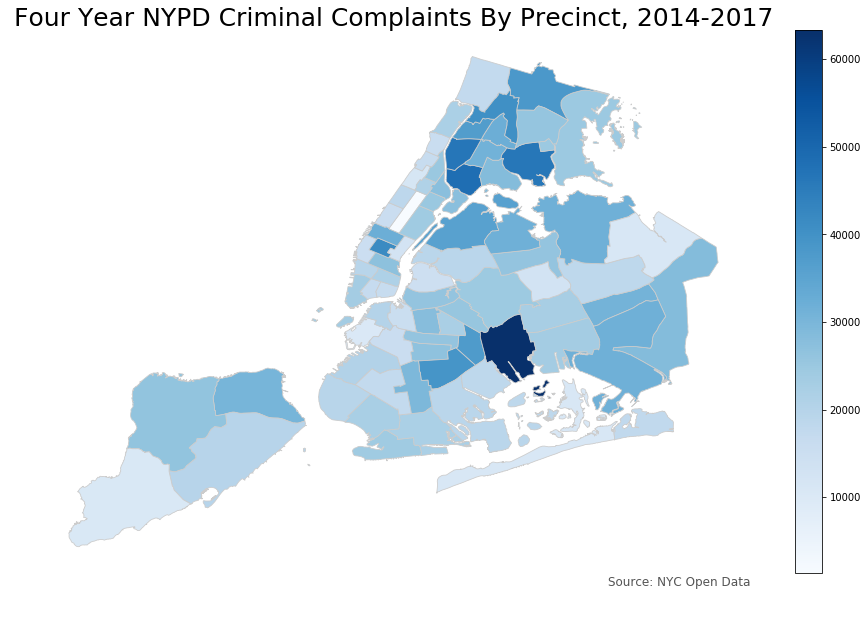

In [14]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'four_yr_total'
# set the range for the choropleth
vmin, vmax = min(merge_df.four_yr_total), max(merge_df.four_yr_total)
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 10))
merge_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)
ax.axis('off')
ax.set_title('Four Year NYPD Criminal Complaints By Precinct, 2014-2017', fontdict={'fontsize': '25', 'fontweight' : '3'});
ax.annotate('Source: NYC Open Data',
            xy=(0.7, .08),
            xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)



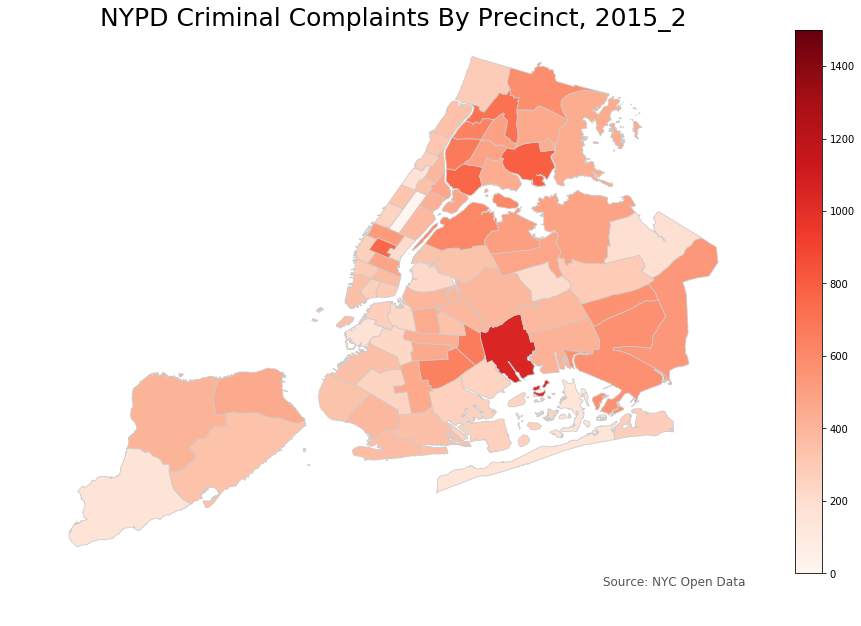

In [15]:
# set a variable that will call whatever column we want to visualise on the map
variable = '2015_2'
# set the range for the choropleth
vmin, vmax = 0, 1500
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 10))
merge_df.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)
ax.axis('off')
ax.set_title(f'NYPD Criminal Complaints By Precinct, {variable}', fontdict={'fontsize': '25', 'fontweight' : '3'});
ax.annotate('Source: NYC Open Data',
            xy=(0.7, .08),
            xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)



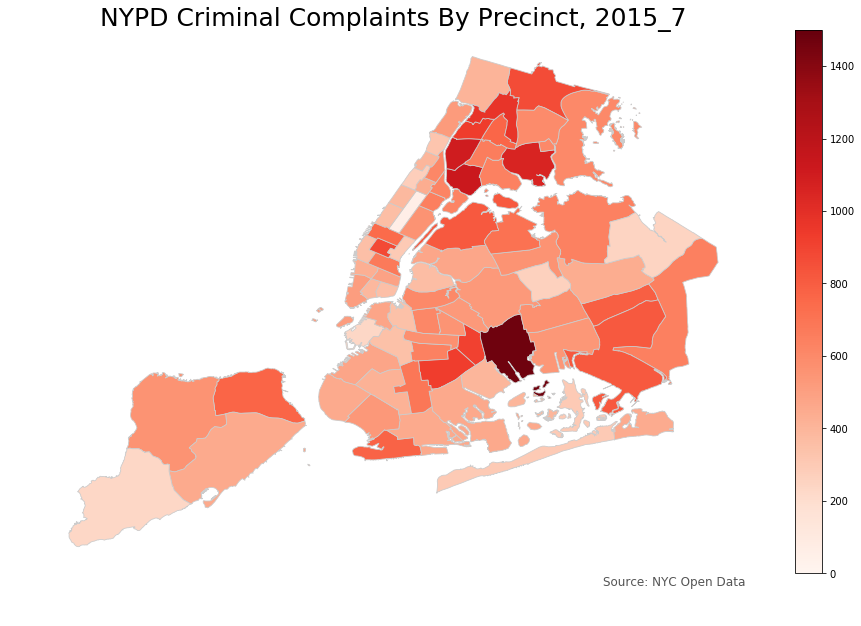

In [16]:
# set a variable that will call whatever column we want to visualise on the map
variable = '2015_7'
# set the range for the choropleth
vmin, vmax = 0, 1500
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 10))
merge_df.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)
ax.axis('off')
ax.set_title(f'NYPD Criminal Complaints By Precinct, {variable}', fontdict={'fontsize': '25', 'fontweight' : '3'});
ax.annotate('Source: NYC Open Data',
            xy=(0.7, .08),
            xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)



In [17]:
# save all the maps in the charts folder
output_path = 'data/maps'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_months = ['2014_1', '2014_2', '2014_3', '2014_4', '2014_5', '2014_6', 
                 '2014_7', '2014_8', '2014_9', '2014_10', '2014_11', '2014_12']

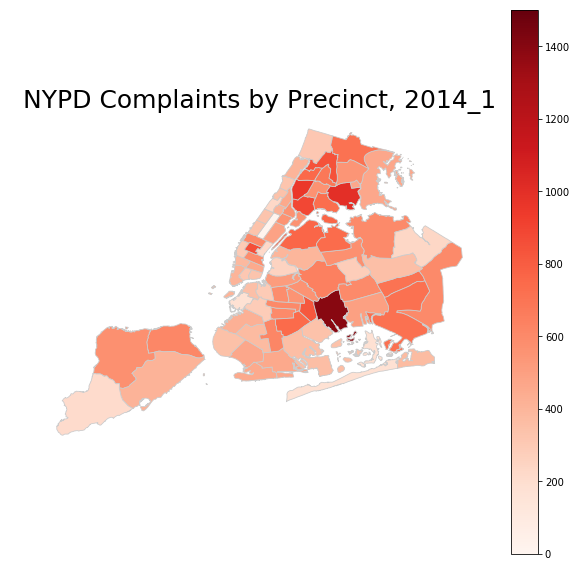

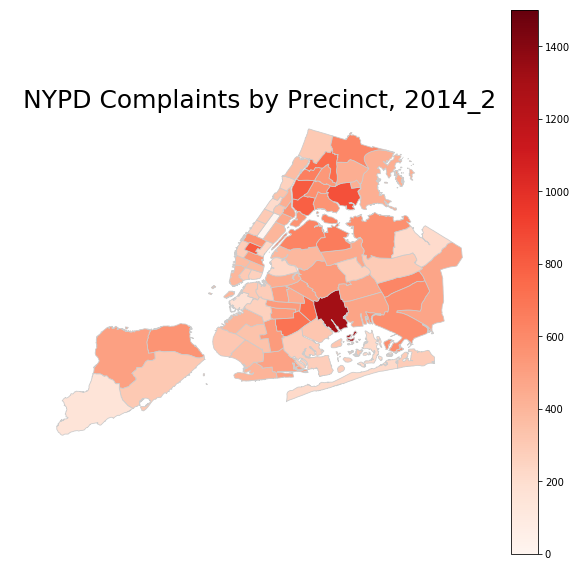

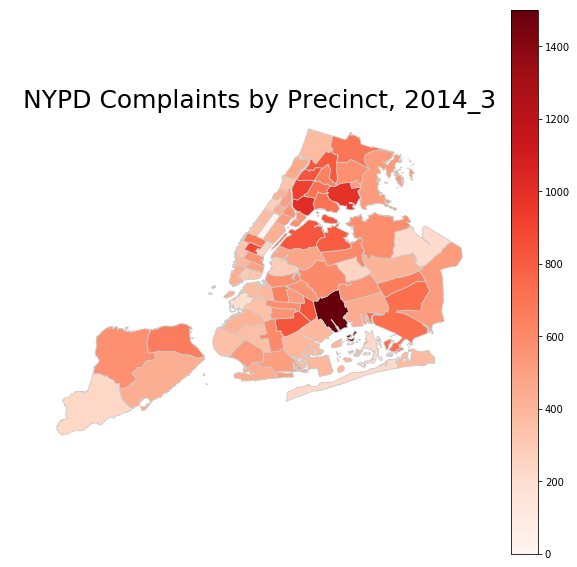

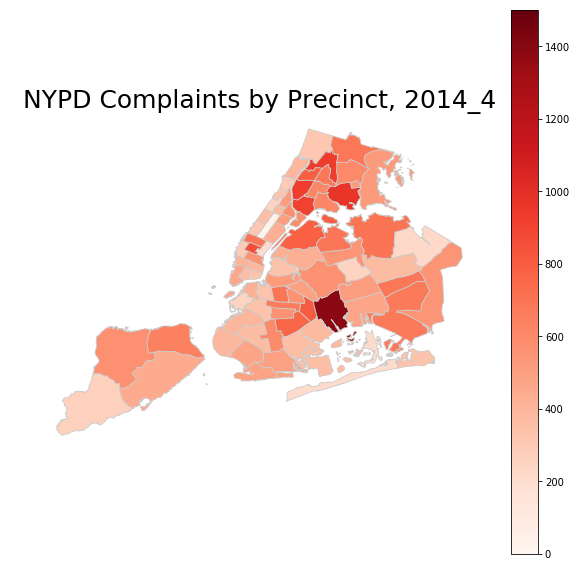

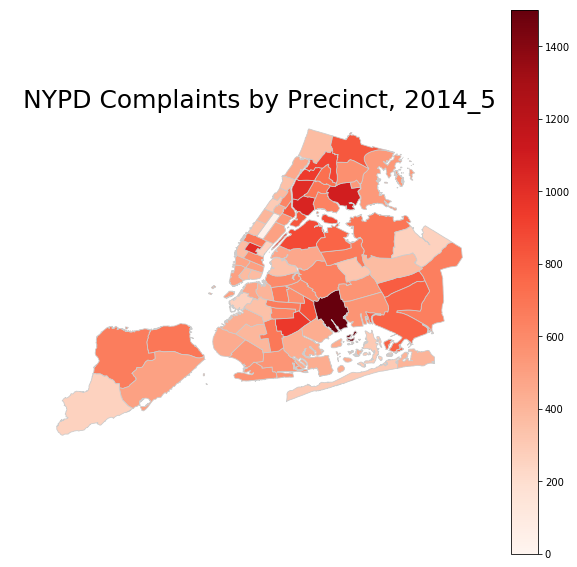

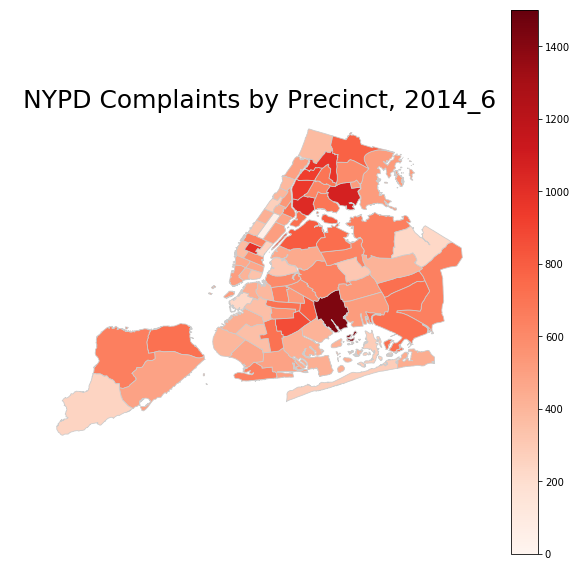

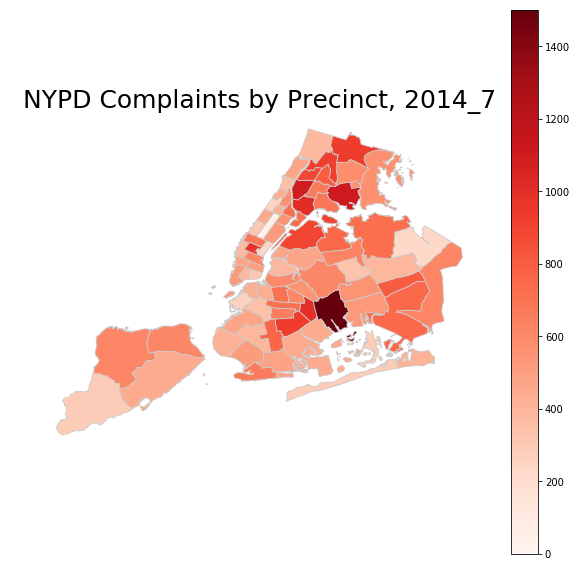

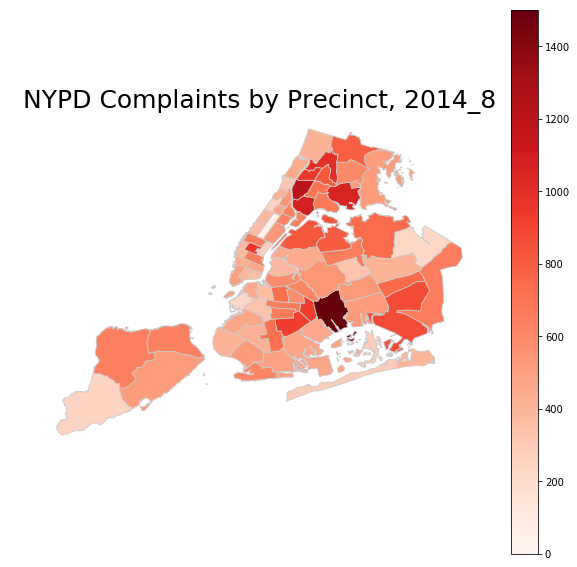

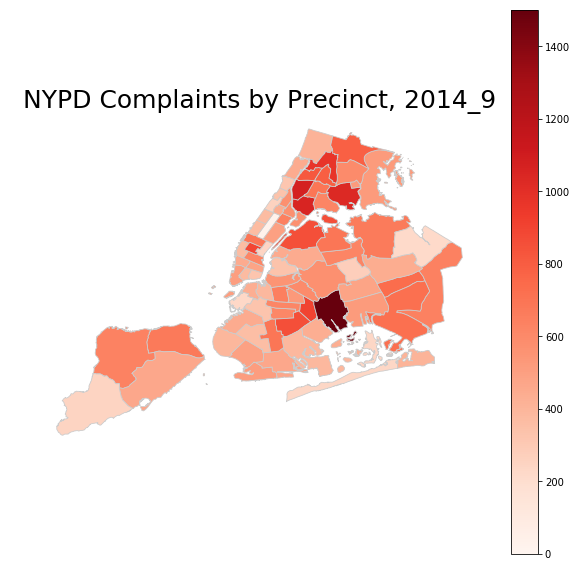

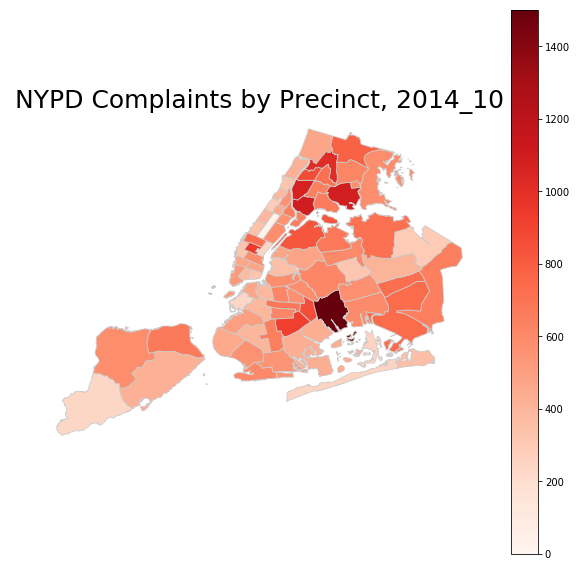

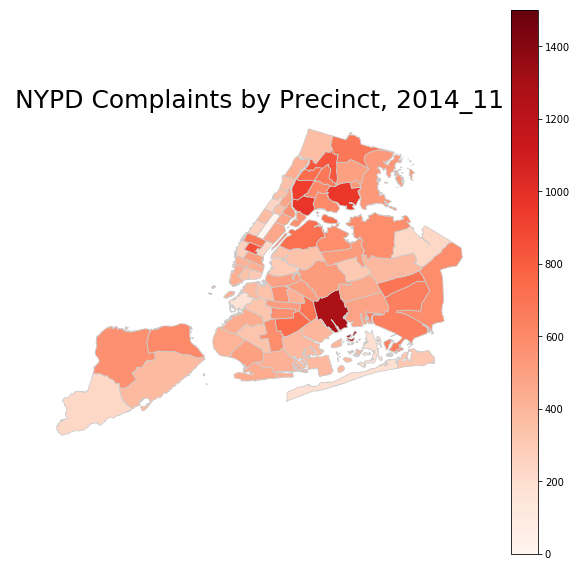

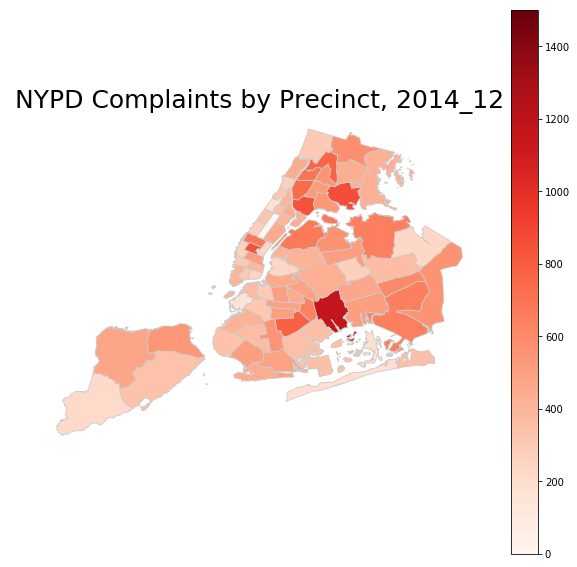

In [19]:
import os

# set the min and max range for the choropleth map
vmin, vmax = 0, 1500

# start the for loop to create one map per year
for month in list_of_months:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = merge_df.plot(column=month, cmap='Reds', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title(f'NYPD Complaints by Precinct, {month}', 
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, month + '_crime.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [20]:
import geopandas as gpd
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [21]:
slider_columns = list_of_months
merge_df.plot_bokeh(#simplify_shapes=20,
                    figsize=(900, 700),
                    slider=slider_columns,
                    slider_range=range(len(list_of_months)),
                    slider_name='month',
                    colormap='Inferno',
                    hovertool_columns=['precinct'] + slider_columns,
                    title='NYPD Complaints by Month'
                   );

## Interactive Choropleth By Season, Aggregate 2014-2017

In [22]:
precinct_season = pd.read_csv('./data/precinct_agg_season.csv')
precinct_season.head()

,precinct,1,2,3,4
0,1.0,5410,5712,6205,6142
1,5.0,3821,4262,4531,4420
2,6.0,4307,4834,5359,5098
3,7.0,3720,4189,4368,4179
4,9.0,4936,5394,5732,5514


In [23]:
merge_map_season = pd.merge(map_df, precinct_season, on='precinct')
merge_map_season.head()

,precinct,shape_area,shape_leng,geometry,1,2,3,4
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...,5410,5712,6205,6142
1,5.0,1.808880e+07,18676.124259,POLYGON ((-73.98863862848766 40.72293372026369...,3821,4262,4531,4420
2,6.0,2.209819e+07,26402.900669,POLYGON ((-73.99968392160721 40.73855224865976...,4307,4834,5359,5098
3,71.0,4.533179e+07,29978.094261,POLYGON ((-73.92854313809303 40.66457328584737...,6347,6564,7108,6886
4,72.0,1.046213e+08,87968.194520,POLYGON ((-73.99840899113158 40.67186872303234...,4829,5195,5483,5310


In [24]:
min(merge_map_season['1'])

151

In [25]:
slider_columns = ['1','2','3','4']
merge_map_season.plot_bokeh(simplify_shapes=20,
                    figsize=(900, 600),
                    slider=slider_columns,
                    slider_range=range(len(slider_columns)),
                    slider_name='season',
                    hovertool_columns=['precinct'] + slider_columns,
                    colormap='Inferno',
                    title='NYPD Complaints by Season'
                   )

Column(id='1233', ...)